# Zomato Data Analysis Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'J:\Data analyst Post\Python\Zomato food Order\Zomato data .csv',encoding='UTF-8')

In [54]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [56]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [57]:
data['rate']=data['rate'].str.rstrip("/5")
data['rate']=data['rate'].astype("float")

In [58]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [59]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [60]:
data['name'].duplicated().sum()

3

In [61]:
data.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


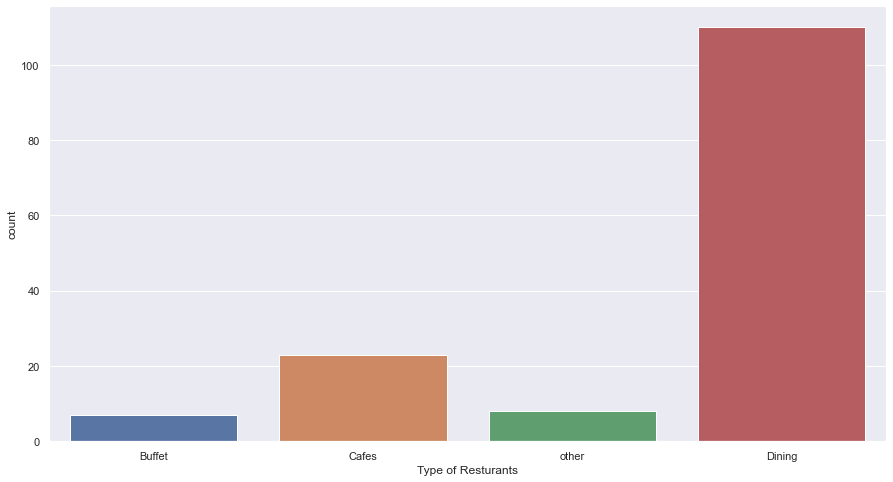

In [81]:

sns.countplot(x='listed_in(type)',data=data)
plt.xlabel("Type of Resturants")
#plt.grid()
plt.show()

majority of the resturant falls in dining catogaries

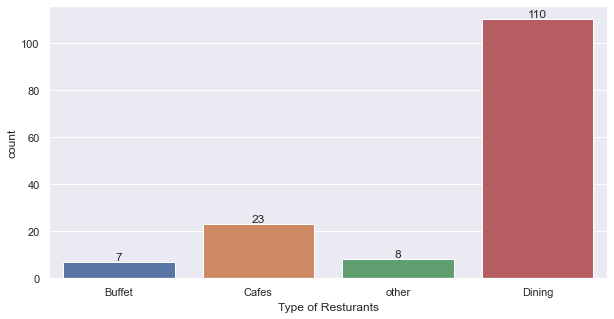

In [66]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='listed_in(type)',data=data)
plt.xlabel("Type of Resturants")
for bars in ax.containers:
    ax.bar_label(bars)

majority of the resturant falls in dining catogaries

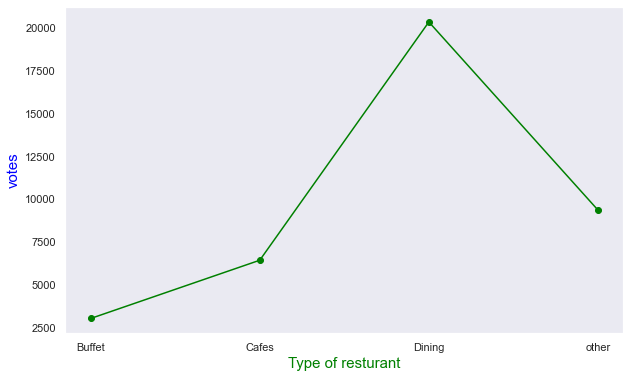

In [68]:
#voteRate=data.groupby('listed_in(type)').agg({"votes":"sum()"})
voteRate=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({"votes":voteRate})
plt.figure(figsize=(10,6))
ax=plt.plot(result,c='green',marker='o')
plt.xlabel('Type of resturant',size=15,c='green')
plt.ylabel('votes',size=15,c='blue')
plt.grid()
plt.show()

dining rasturant have maximum votes

In [69]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


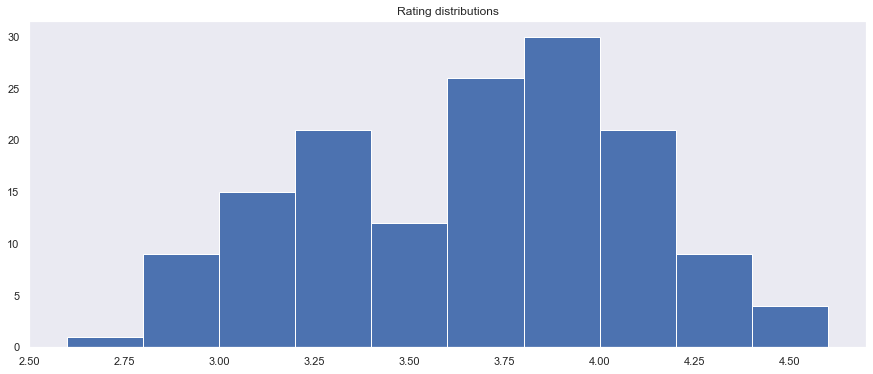

In [70]:
plt.figure(figsize=(15,6))
plt.hist(x=data['rate'],bins=10)
plt.title("Rating distributions")
plt.grid()
plt.show()

Rating between 3.25 to 4

In [71]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [72]:
mostCost=data['approx_cost(for two people)']

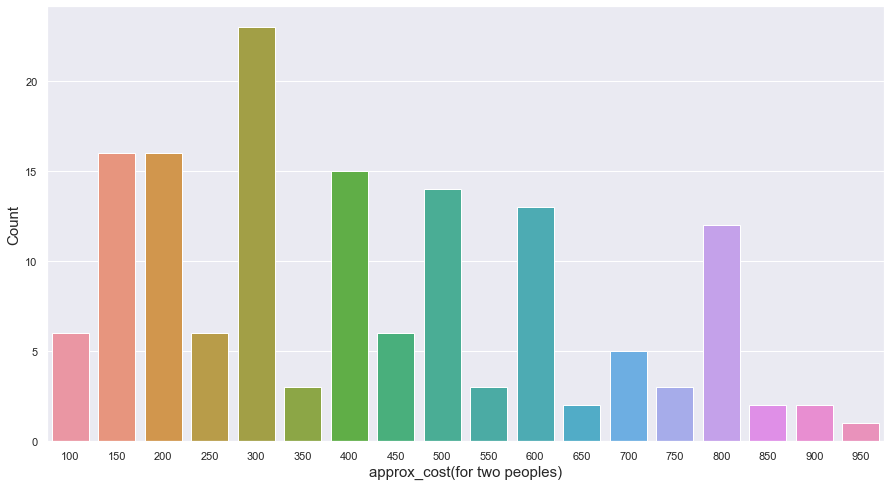

In [76]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='approx_cost(for two people)',data=data,)
plt.xlabel("approx_cost(for two peoples)",size=15)
plt.ylabel("Count",size=15)
plt.show()
for bars in ax.containers:
    ax.bar_label(bars)

Majority of couples of spending cost in 200 to 500

In [20]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


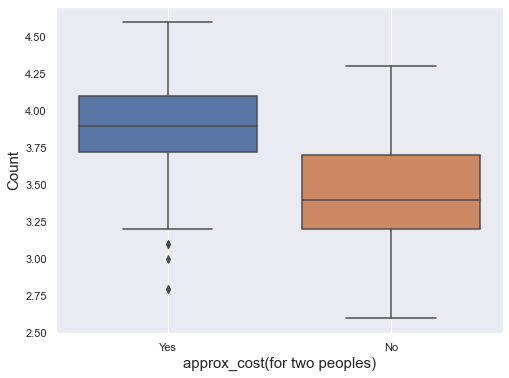

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['online_order'],y=data['rate'])
plt.xlabel("approx_cost(for two peoples)",size=15)
plt.ylabel("Count",size=15)
plt.grid()
plt.show()

Online is heiger rating and ofline rating is lower

In [25]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


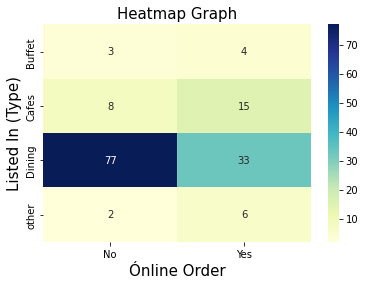

In [6]:
pivot_table=data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0,)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d',)
plt.title("Heatmap Graph",size=15)
plt.xlabel('Ónline Order',size=15)
plt.ylabel('Listed In (Type)',size=15)
plt.show()